In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


In [2]:
#Reading the dataset voice.csv

data = pd.read_csv("voiceDataSet.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#To check the distribution of male and female across all the attributes

data.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


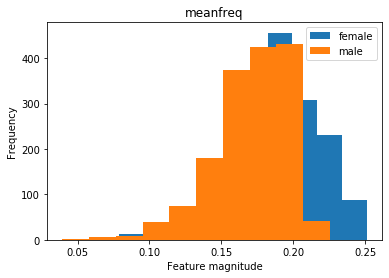

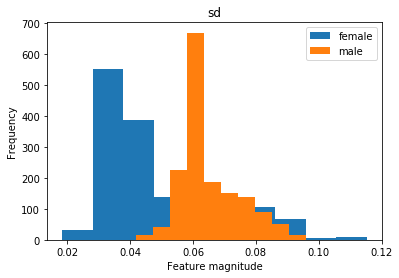

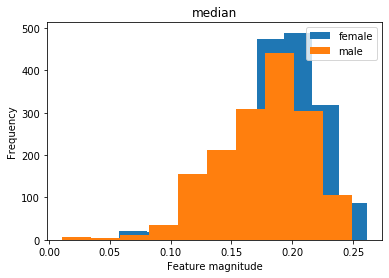

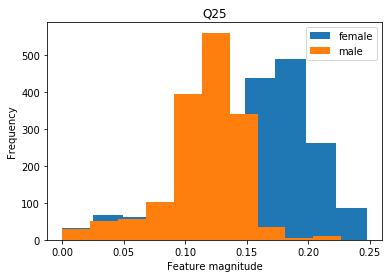

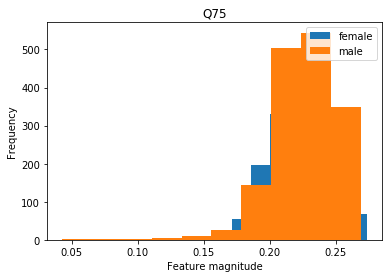

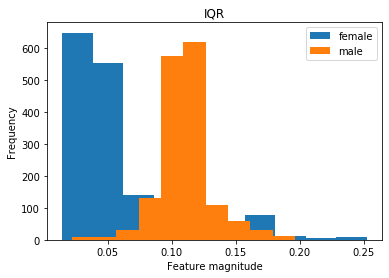

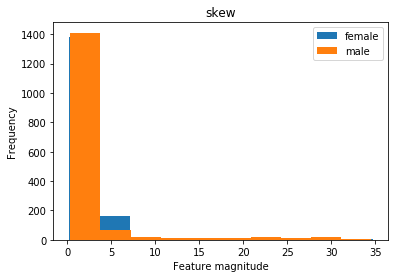

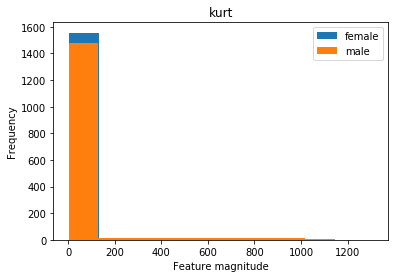

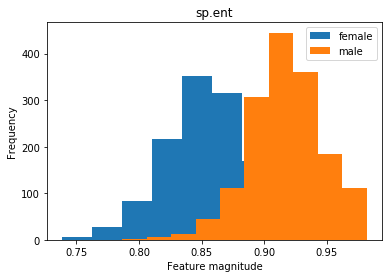

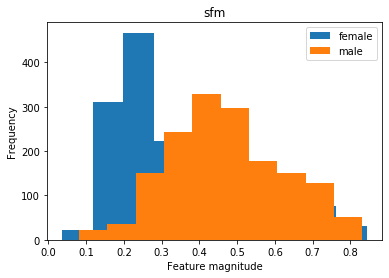

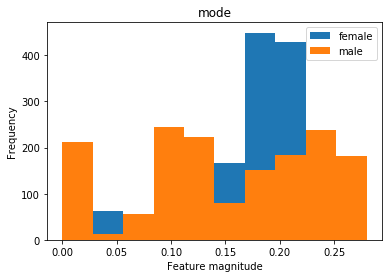

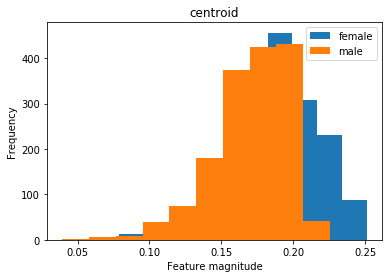

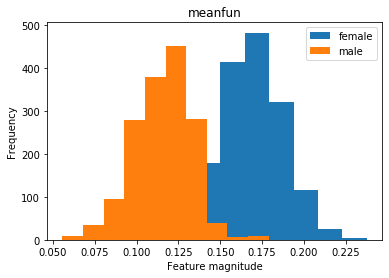

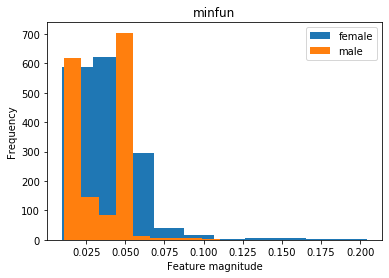

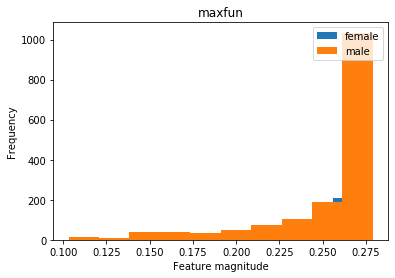

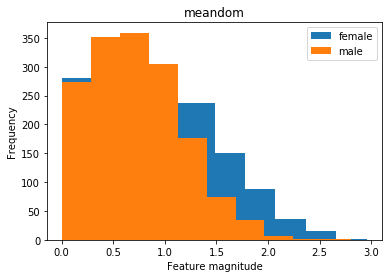

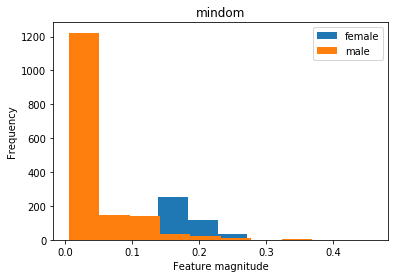

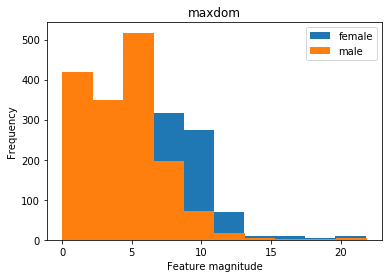

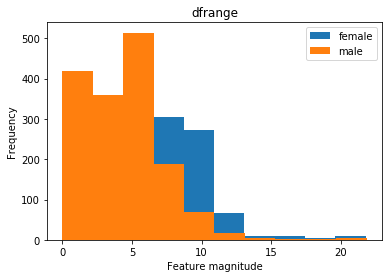

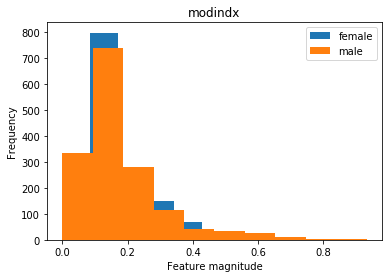

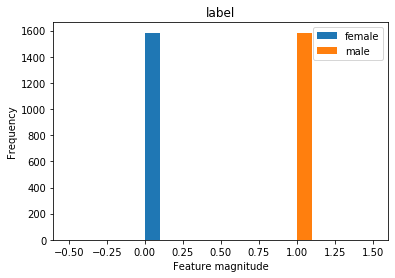

In [12]:
#Check the distribution of male and female in each feature columns



for col in data.columns:
    plt.hist(data.loc[data['label'] == 0, col],label ="female")
    plt.hist(data.loc[data['label'] == 1, col],label="male")
    plt.title(col)
    plt.xlabel("Feature magnitude")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

In [13]:
#Encoding the label column. Female to 0 and male to 1

class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
class_mapping

{0: 0, 1: 1}

In [14]:
# Converting class labels from strings to integers

data['label'] = data['label'].map(class_mapping)


In [15]:
#Creating X,y and splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [16]:
#Scaling the features

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [17]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test_std, y_test)))

y_pred_logit = logit.predict(X_test_std)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#Train decision tree model


tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

In [19]:
#Train random forest model

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train_std, y_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_std, y_test)))

y_pred_forest = forest.predict(X_test_std)
print("Predicted value: ",y_pred_forest)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

In [20]:
#Train support vector machine model

svm = SVC()
svm.fit(X_train_std, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_std, y_test)))

y_pred_sm = svm.predict(X_test_std)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.989
Accuracy on test set: 0.974
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [21]:
#Plot the graph for feature selection for decision tree and random forest
def plot_feature_importances_mydata(model):
    n_features = X_train_std.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(data))
    plt.title("Feature Selection")
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.show()

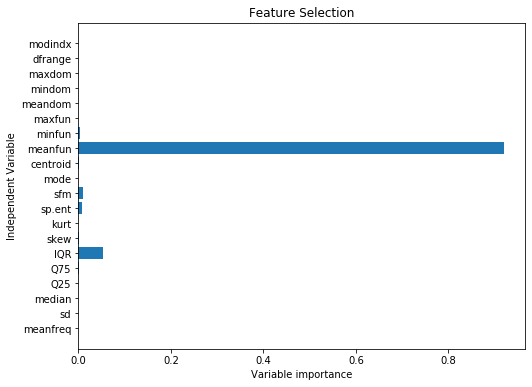

In [22]:
plot_feature_importances_mydata(tree)

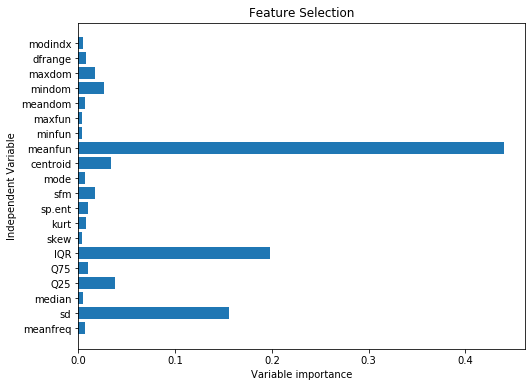

In [23]:
plot_feature_importances_mydata(forest)

In [24]:
#Read the file which got generated using our voice samples and using code written in R.

data_new = pd.read_csv("voiceSamples.csv")
data_new.head()


#Creating X and Y
X1, y1 = data_new.iloc[:, :-1].values, data_new.iloc[:, -1].values
y1

#standardizing the features
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1)

#Predicting the target variable using Logistic, Decision Tree , Random Forest, SVM
y1_pred_logit = logit.predict(X1_std)
y1_pred_tree = tree.predict(X1_std)
y1_pred_forest = forest.predict(X1_std)
y1_pred_svm = svm.predict(X1_std)


print("Logistic Regression: ",y1_pred_logit)
print("TRee",y1_pred_tree)
print("Random Forest: ",y1_pred_forest)
print("SVM: ",y1_pred_svm)


Logistic Regression:  [1 1 1 0 0 0 0 0 0 0 0]
TRee [1 1 1 0 0 1 0 0 0 0 0]
Random Forest:  [1 1 1 0 0 0 0 0 0 0 0]
SVM:  [1 1 1 0 0 0 0 0 0 0 0]


In [27]:
df = pd.read_csv("v1DataSet.csv")
df.head()

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
word        1104 non-null object
disgust     1104 non-null float64
surprise    1104 non-null float64
neutral     1104 non-null float64
anger       1104 non-null float64
sad         1104 non-null float64
happy       1104 non-null float64
fear        1104 non-null float64
dtypes: float64(7), object(1)
memory usage: 69.1+ KB


In [38]:
df.corr()

,disgust,surprise,neutral,anger,sad,happy,fear
disgust,1.000000,0.149072,0.557045,0.142729,0.150864,0.049825,0.148948
surprise,0.149072,1.000000,0.396969,-0.017968,0.104156,-0.065244,0.043478
neutral,0.557045,0.396969,1.000000,0.259740,0.370187,0.181255,0.312440
anger,0.142729,-0.017968,0.259740,1.000000,0.038070,-0.118633,-0.058962
sad,0.150864,0.104156,0.370187,0.038070,1.000000,-0.085120,0.070484
happy,0.049825,-0.065244,0.181255,-0.118633,-0.085120,1.000000,-0.106338
fear,0.148948,0.043478,0.312440,-0.058962,0.070484,-0.106338,1.000000


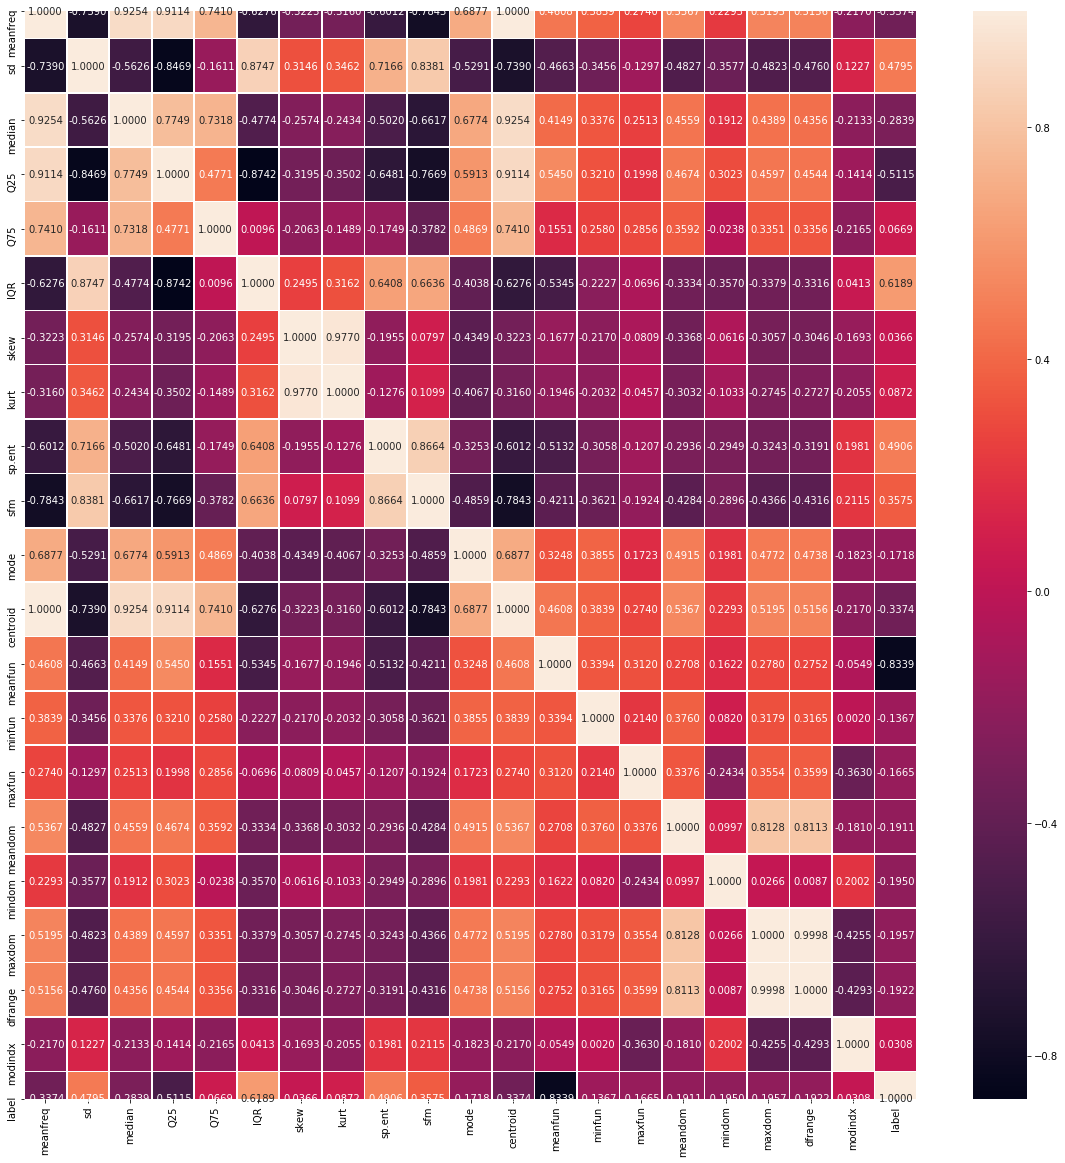

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation map 
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot = True, linewidths = 0.6, fmt = ".4f", ax=ax)
plt.show()

In [41]:
df.head(15)

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346
5,acceptance,0.002747,0.008242,0.002747,0.013736,0.024725,0.090659,0.013736
6,accounting,0.017857,0.017857,0.017857,0.017857,0.053571,0.089286,0.017857
7,accuracy,0.035714,0.107143,0.035714,0.035714,0.035714,0.035714,0.035714
8,achieve,0.001382,0.004147,0.000461,0.005069,0.006912,0.122120,0.005069
9,acid,0.017857,0.017857,0.017857,0.017857,0.125000,0.017857,0.017857


In [42]:
df.columns

Index(['word', 'disgust', 'surprise', 'neutral', 'anger', 'sad', 'happy',
       'fear'],
      dtype='object')

In [28]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [29]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [30]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [32]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Andbrain_DataSet.csv has 1104 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('v1DataSet.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'v1DataSet.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [33]:
df1.head(5)

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346


In [34]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

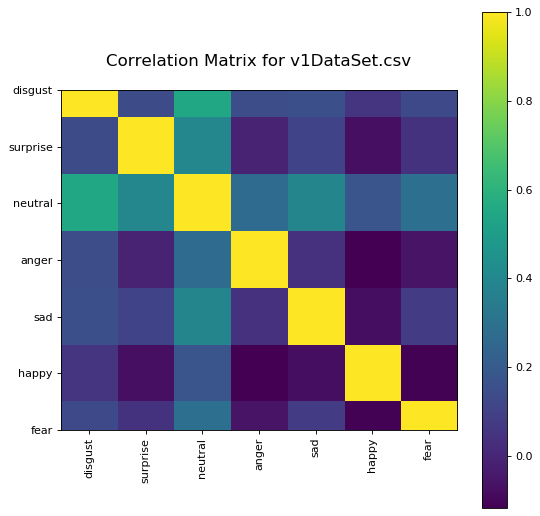

In [35]:
plotCorrelationMatrix(df1, 8)

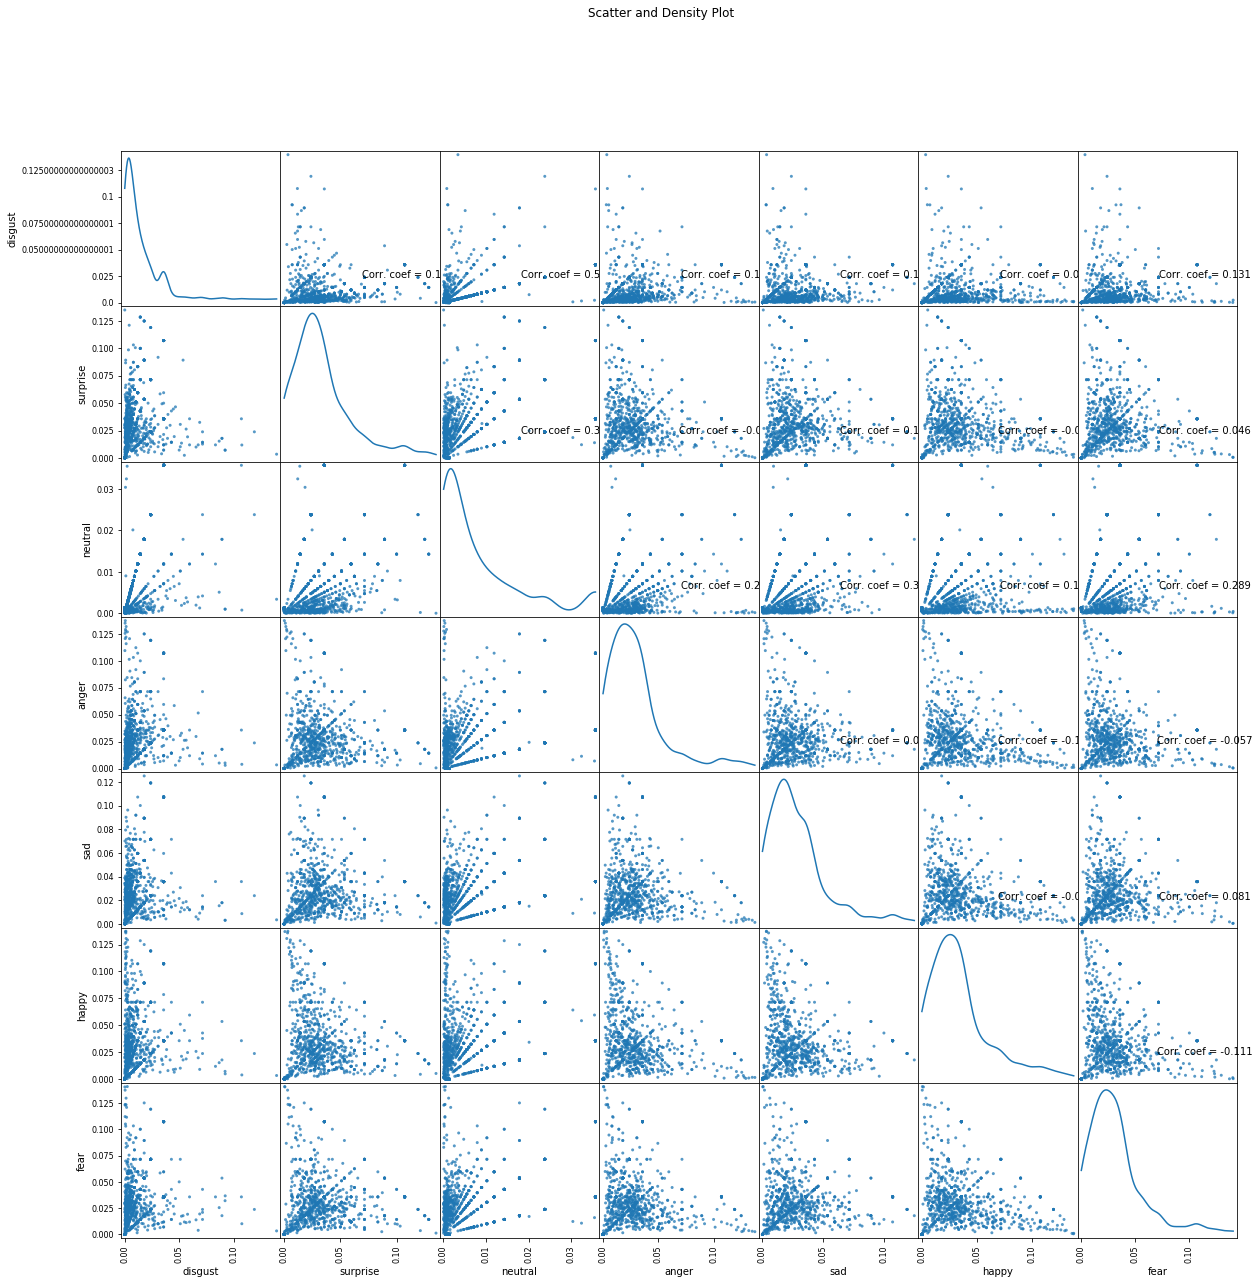

In [36]:
plotScatterMatrix(df1, 20, 10)

In [48]:
#Creating X,y and splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X1, y1 = data.iloc[:, :-1].values, data.iloc[:, -1].values

X1_train, X1_test, y1_train, y1_test =\
    train_test_split(X1, y1, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y1)

In [49]:
#scaling the features

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X1_train_std = stdsc.fit_transform(X1_train)
X1_test_std = stdsc.transform(X1_test)

In [50]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X1_train_std, y1_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X1_train_std, y1_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X1_test_std, y1_test)))

y1_pred_logit = logit.predict(X1_test_std)
print("Predicted value: ",y1_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y1_test, y1_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X1_train_std, y1_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X1_train_std, y1_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X1_test_std, y1_test)))

y1_pred_logit = logit.predict(X1_test_std)
print("Predicted value: ",y1_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y1_test, y1_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
#Train random forest model

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X1_train_std, y1_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X1_train_std, y1_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X1_test_std, y1_test)))

y1_pred_forest = forest.predict(X1_test_std)
print("Predicted value: ",y1_pred_forest)

precision, recall, fscore, support = precision_recall_fscore_support(y1_test, y1_pred_forest, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

In [53]:
#Train support vector machine model

svm = SVC()
svm.fit(X1_train_std, y1_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X1_train_std, y1_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X1_test_std, y1_test)))

y1_pred_sm = svm.predict(X1_test_std)
print("Predicted value: ",y1_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y1_test, y1_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.989
Accuracy on test set: 0.974
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [56]:
#Plot the graph for feature selection for decision tree and random forest
def plot_feature_importances_mydata(model):
    n_features = X1_train_std.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(dt))
    plt.title("Feature Selection")
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.show()

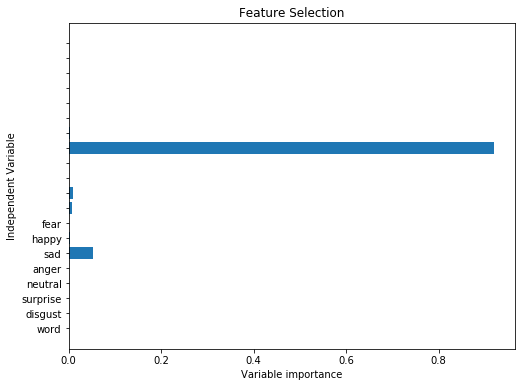

In [57]:
plot_feature_importances_mydata(tree)

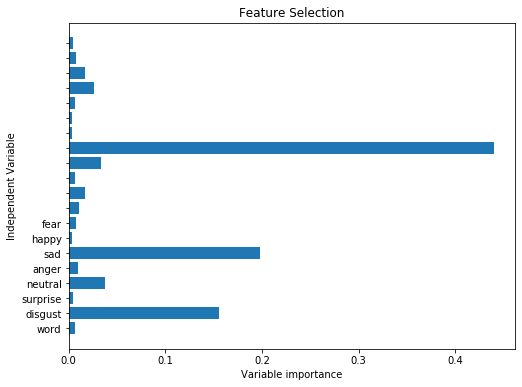

In [58]:
plot_feature_importances_mydata(forest)

In [59]:
data_new = pd.read_csv("voiceSamples.csv")
data_new.head()


#Creating X and Y
X2, y2 = data_new.iloc[:, :-1].values, data_new.iloc[:, -1].values
y2

#standardizing the features
stdsc = StandardScaler()
X2_std = stdsc.fit_transform(X2)

#Predicting the target variable using Logistic, Decision Tree , Random Forest, SVM
y2_pred_logit = logit.predict(X2_std)
y2_pred_tree = tree.predict(X2_std)
y2_pred_forest = forest.predict(X2_std)
y2_pred_svm = svm.predict(X2_std)


print("Logistic Regression: ",y2_pred_logit)
print("TRee",y2_pred_tree)
print("Random Forest: ",y2_pred_forest)
print("SVM: ",y2_pred_svm)

Logistic Regression:  [1 1 1 0 0 0 0 0 0 0 0]
TRee [1 1 1 0 0 1 0 0 0 0 0]
Random Forest:  [1 1 1 0 0 0 0 0 0 0 0]
SVM:  [1 1 1 0 0 0 0 0 0 0 0]
